In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from math import sqrt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
unpickled_df = pd.read_pickle("./saleprice_1.pkl")
unpickled_df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,mszoning_RL,mszoning_RM,street_Pave,years_before_sale,years_since_remodel,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,1,0,1,5,5,0,0,1,0,1
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,1,0,1,31,31,0,0,1,0,1
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,1,0,1,7,6,0,0,1,0,1
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,1,0,1,91,36,0,0,1,0,1
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,1,0,1,8,8,0,0,1,0,1


In [11]:
unpickled_df = pd.concat([unpickled_df,pd.get_dummies(unpickled_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
unpickled_df = pd.concat([unpickled_df,pd.get_dummies(unpickled_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(unpickled_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(unpickled_df.street, prefix="street", drop_first=True).columns)


In [12]:
unpickled_df.head()

# Modelling

X = unpickled_df[['mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'masvnrarea', 'bsmtfinsf1', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'bsmtfullbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'screenporch',
       'poolarea'] + dummy_column_names]
y = unpickled_df.saleprice
X_train, X_test, y_train, y_test = train_test_split(X, y)


Score, Root Mean Squared Error values
_____________________________________________________________________________
Linear =  (0.8380399376673008, 28053.77812551502)
_____________________________________________________________________________
Ridge =  (0.8393069249603439, 27943.832604275805)
_____________________________________________________________________________
Lasso =  (0.8380401975594463, 28053.755617004572)
_____________________________________________________________________________
ElasticNet =  (0.8330827319271832, 28479.87142231616)
_____________________________________________________________________________
Selected Features for RamdomForest [5.04455482e-03 7.08686244e-03 1.09303454e-02 5.63836584e-01
 5.58942825e-03 4.49736710e-03 3.24807469e-02 4.31579034e-03
 4.11032362e-02 1.95256494e-02 6.44091156e-02 1.42188114e-01
 1.66898464e-03 1.55673387e-02 4.41421849e-04 8.49803455e-04
 2.73238735e-03 4.56870352e-03 3.85514523e-03 1.39197195e-02
 1.76730079e-02 2.31466794e-

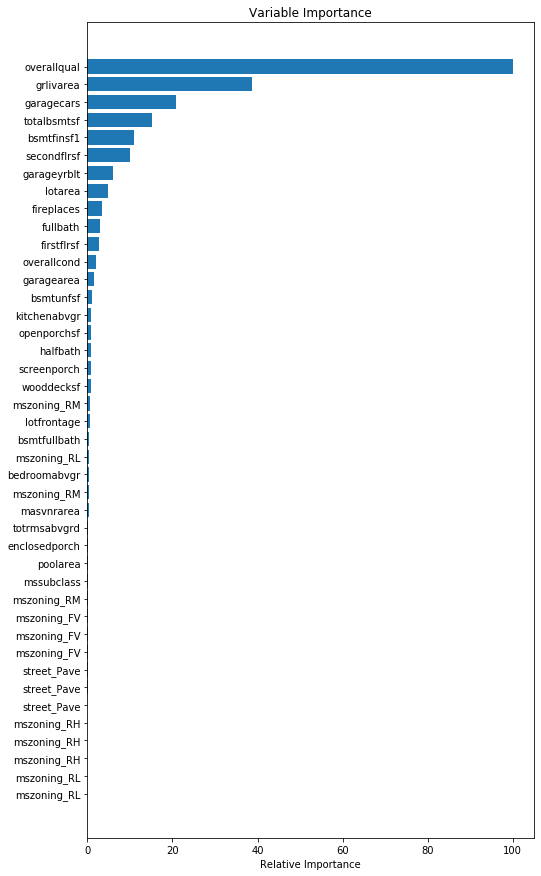

Selected Features for Gradientboosting [3.70285149e-04 2.49046047e-03 2.07281126e-02 4.38511873e-01
 8.70297314e-03 1.38127555e-03 4.84295876e-02 4.95134082e-03
 6.65814860e-02 1.19593785e-02 4.39213887e-02 1.69802600e-01
 2.03750163e-03 1.34073454e-02 3.57207695e-03 1.40540947e-03
 3.97426708e-03 6.22216146e-04 1.46474660e-02 2.59113488e-02
 9.11832267e-02 7.04093897e-03 3.15390368e-03 3.81905701e-03
 5.58938443e-04 3.51592984e-03 5.46221923e-04 1.39923058e-04
 9.62952001e-05 9.23805542e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.76138714e-03 0.00000000e+00 0.00000000e+00
 2.04551578e-04 2.90345627e-03 1.39887523e-03 8.86181907e-05
 6.12577722e-05 2.66457952e-05]
GradientBoosting =  (0.905864523743519, 21387.698453943223)


In [13]:
def linear():
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def ridge():
    regressor = Ridge(alpha=.3, normalize=True)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def lasso():
    regressor = Lasso(alpha=0.00009, normalize=True)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def elasticnet():
    regressor = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def randomforest():

    regressor = RandomForestRegressor(n_estimators=15,min_samples_split=15,criterion='mse',max_depth=None)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    #score=cross_val_score(regressor,X,y,cv=10)
    print("Selected Features for RamdomForest",regressor.feature_importances_)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def decisiontree():
    regressor = DecisionTreeRegressor( min_samples_split=30,max_depth=None)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for DecisionTrees",regressor.feature_importances_)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def gradientboosting():
    # make 500 iterations, use 2-deep trees
    regressor = GradientBoostingRegressor(loss='ls',n_estimators=500,max_depth=2, min_samples_split=15).fit(X_train, y_train)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    # Start measure of how important various features are by counting how many times a feature is 
    # used over the course of many decision trees.
    feature_importance = regressor.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(8,15))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.savefig("img/var_Importance.png", bbox_inches='tight', pad_inches=2)
    plt.show()
    # End Measure
    print("Selected Features for Gradientboosting",regressor.feature_importances_)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))



print ("Score, Root Mean Squared Error values")
print("_____________________________________________________________________________")
print ("Linear = ",linear())
print("_____________________________________________________________________________")
print ("Ridge = ",ridge())
print("_____________________________________________________________________________")
print ("Lasso = ",lasso())
print("_____________________________________________________________________________")
print ("ElasticNet = ",elasticnet())
print("_____________________________________________________________________________")
print ("RandomForest = ",randomforest())
print("_____________________________________________________________________________")
print ("DecisionTree = ",decisiontree())
print("_____________________________________________________________________________")
print ("GradientBoosting = ",gradientboosting())


#### It appears that overllqual and grlivarea are the most important features in predicting the house price.